In [1]:
import seaborn

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import linear as lr

In [2]:
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


# Linear Regression (continious target)

In [4]:
BATCH_SIZE = 100
TRAINING_EPOCHS = 200

In [5]:
data = lr.load_boston_data()
data = lr.preprocess_linear_data(data)
my_dataset = lr.load_dataset(data[0].shape[0])

In [6]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []

In [7]:
my_dataset.train.p \
    .load(data) \
    .train_linear(sess, cost_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

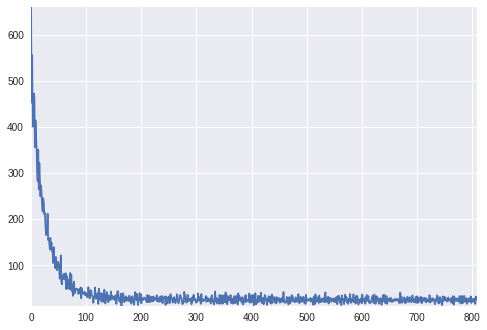

In [8]:
lr.plot_cost(cost_history)

In [10]:
mse = []
y_pred = np.zeros([len(my_dataset.test.indices), 1])
y_true = np.zeros([len(my_dataset.test.indices), 1])
x_features = np.zeros([len(my_dataset.test.indices), 13])

In [11]:
test_batch = my_dataset.test.p. \
    load(data) \
    .test_linear(sess, y_true, y_pred, mse, x_features) \
    .run(len(my_dataset.test.indices))

In [32]:
print ('Variance ratio: %.2f' % (np.var(y_pred, ddof=1) /np.var(y_true, ddof=1)))

Variance ratio: 1.02


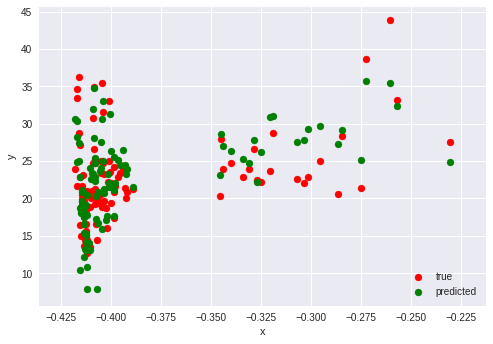

In [39]:
axis = plt.subplots()[1]
#axis.scatter(y_true, y_pred)
axis.scatter(np.sort(x_features[:, 0]) , y_true, c='r', label='true')
axis.scatter(np.sort(x_features[:, 0]), y_pred, c='g', label='predicted')
axis.legend(loc='lower right')
axis.set_xlabel('x')
axis.set_ylabel('y')
plt.show()

# Logistic Regression (Binary target)

In [25]:
data = lr.load_random_data(blobs=False)
data = lr.preprocess_logistic_data(data)
my_dataset = lr.load_dataset(data[0].shape[0])

In [37]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []
acc_history = []

In [38]:
my_dataset.train.p \
    .load(data) \
    .train_logistic(sess, cost_history, acc_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

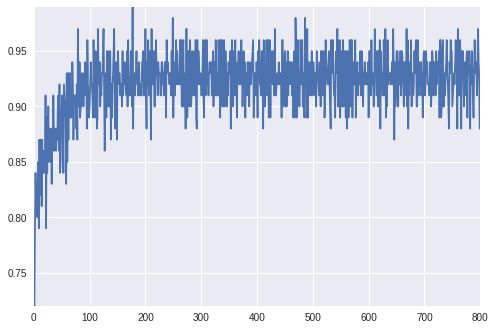

In [39]:
lr.plot_cost(acc_history)

In [40]:
acc = []
test_batch = my_dataset.test.p.load(data).test_logistic(sess, acc).run(len(my_dataset.test.indices))

In [41]:
print("ACCURACY: %.0f%%" % (100.0 * acc[0]))

ACCURACY: 95%


# Poisson Regression (discret target)

In [51]:
data = lr.load_poisson_data()
my_dataset = lr.load_dataset(data[1].shape[0])

In [52]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cost_history = []

In [53]:
my_dataset.train.p \
    .load(data[1:]) \
    .train_poisson(sess, cost_history) \
    .run(BATCH_SIZE, shuffle=True, n_epochs=TRAINING_EPOCHS)

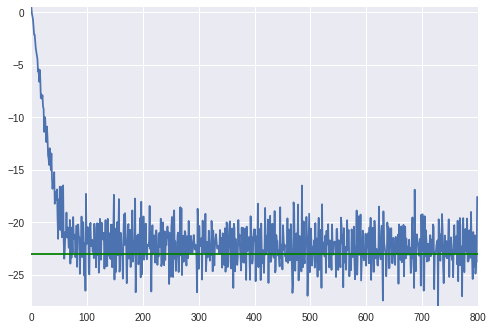

In [54]:
lr.plot_log_cost(sess, data, cost_history)

In [55]:
logit = np.zeros([len(my_dataset.test.indices), 1])
y_true = np.zeros([len(my_dataset.test.indices), 1])
weights = np.zeros(data[0].shape)

In [56]:
test_batch = my_dataset.test.p.load(data[1:]).test_poisson(sess, y_true, logit, weights).run(len(my_dataset.test.indices))

In [62]:
lmbd = np.dot(data[1], data[0])

In [59]:
print ('Variance ratio: %.2f' % (np.var(logit, ddof=1) / np.var(lmbd, ddof=1)))

Variance ratio: 0.90


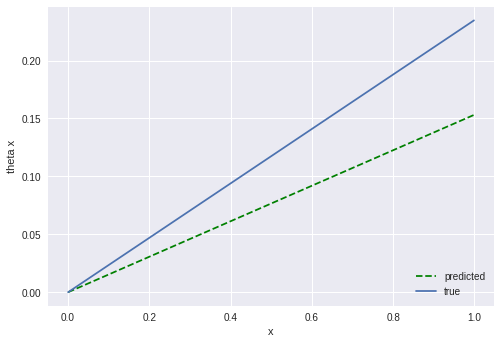

In [61]:
plt.plot(np.sort(data[1][:,0]), weights[0, 0]*np.sort(data[1][:,0]), '--', c='g', label = 'predicted')
plt.plot(np.sort(data[1][:,0]), data[0][0, 0]*np.sort(data[1][:,0]), label='true')
plt.xlabel('x')
plt.ylabel('theta x')
plt.legend(loc='lower right')
plt.show()